# WARP

In [ ]:
#!pip install opencv-python

In [1]:
#!pip install dlib

^C


In [5]:
#!pip install imutils

  Created wheel for imutils: filename=imutils-0.5.3-py3-none-any.whl size=25856 sha256=22abd774f82583042cf8b1d4d0275e250b8227a19ea0be7a050f083d6f2d40af
  Stored in directory: c:\users\cute\appdata\local\pip\cache\wheels\c8\d6\0f\b0c3892b70c59f0d202f8619a449f7d14cb839a0af2f943869
Successfully built imutils


In [3]:
dlib.__version__

'19.21.1'

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import PiecewiseAffineTransform, warp
from skimage import data
import pandas as pd
from scipy.interpolate import Rbf
import cv2

In [3]:
# rbf코드 참고 : https://relate.cs.illinois.edu/course/cs357-f15/file-version/03473f64afb954c74c02e8988f518de3eddf49a4/media/interp/2D%20interpolation%20with%20RBF.html
class PointsRBF: # N 차원 분산 데이터에서 M 차원 영역으로
    def __init__(self, src, dst):
        xsrc = src[:,0]
        ysrc = src[:,1]
        xdst = dst[:,0]
        ydst = dst[:,1]
        self.rbf_x = Rbf( xsrc, ysrc, xdst) #ND 분산 데이터에서 MD 도메인으로 함수의 방사형 기저 함수 보간을위한 클래스
        self.rbf_y = Rbf( xsrc, ysrc, ydst)

    def __call__(self, xy):
        x = xy[:,0]
        y = xy[:,1]
        xdst = self.rbf_x(x,y)
        ydst = self.rbf_y(x,y)
        return np.transpose( [xdst,ydst] )
    
    
def warpRBF(image, src, dst): # warp : 주어진 좌표변환에 따라 이미지 왜곡
    prbf = PointsRBF(dst, src)
    warped = warp(image, prbf) 
    #warp(image, inverse_map) -> 출력 이미지의 좌표를 입력 이미지의 해당 좌표로 변환하는 역 좌표 맵 -> 이걸 PointsRBF로 구현
    warped = 255*warped                         # 0..1 => 0..255
    warped = warped.astype(np.uint8)            # convert from float64 to uint8
    return warped

In [ ]:
### from and to coordintes
coords_from_A = self.df_A_test.loc[files_A].to_numpy().reshape(20,2) #df_A_test는 원본이미지의 랜드마크 좌표들
coords_to_A = fake_B_recon.reshape(20,2)
coords_from_B = self.df_B_test.loc[files_B].to_numpy().reshape(20,2) 
coords_to_B = fake_A_recon.reshape(20,2)

# cocatenate boundary points  
coords_from_A = add_boundary_coords(coords_from_A) # 사진모서리들 경계좌표 추가
coords_to_A = add_boundary_coords(coords_to_A)
coords_from_B = add_boundary_coords(coords_from_B)
coords_to_B = add_boundary_coords(coords_to_B)

### load and warp image
fake_image_A = warpRBF(image_A, coords_from_A, coords_to_A) #(원본이미지, 원본이미지 랜드마크좌표, 냐가 바꾸고싶은 랜드마크 좌표)
fake_image_B = warpRBF(image_B, coords_from_B, coords_to_B)

## cariGAN관련 guthub참고

In [12]:
jawline_landmark_ids = [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 
                        28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 
                        43, 44, 45, 46, 47, 48, 49, 50, 51, 52]

# read csv with coords
df = pd.read_csv('coords.csv', index_col=0)

# empty lists for from and to coords (for warping)
coords_from = []
coords_to = []

# add landmark coords used for warping, transforming jawline of tuple by 20 pixels
for i,coord in enumerate(df.loc['Aamir_Khan_r_4.jpg'].to_numpy().reshape(70,2)):
    x_from = int(coord[0])
    y_from = int(coord[1])
    
    coords_from.append((x_from, y_from))
    
for j,coord2 in enumerate(df.loc['Aamir_Khan_r_3.jpg'].to_numpy().reshape(70,2)):
    x_to= int(coord2[0])
    y_to = int(coord2[1])
    
    coords_to.append((x_to, y_to))
    
    #if i in jawline_landmark_ids:
       # x_to = int(coord[0])
       # y_to = int(coord[1]) + 20
        
    #else:
       # x_to = int(coord[0])
       # y_to = int(coord[1]) + 1
        
   # coords_to.append((x_to,y_to))
   
    
# add boundary points
coords_from.append((0,0))
coords_from.append((256,256))
coords_from.append((256,0))
coords_from.append((0,256))
coords_from.append((0,128))
coords_from.append((128,0))
coords_to.append((0,0))
coords_to.append((256,256))
coords_to.append((256,0))
coords_to.append((0,256))
coords_to.append((0,128))
coords_to.append((128,0))
    
# convert to array    
coords_to = np.array(coords_to)
coords_from = np.array(coords_from)

# import image
img = cv2.imread('image/sol1.png')

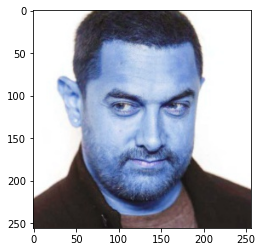

In [31]:
# show undeformed image
plt.imshow(img);

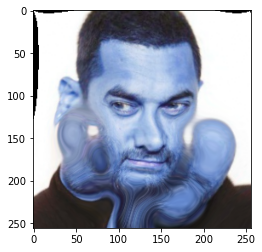

In [32]:
# show deformed image
plt.imshow(warpRBF(img, coords_from, coords_to));

In [13]:
pd.set_option('display.max_columns', 150)

In [14]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139
Aamir_Khan_r_3.jpg,84.000000,99.923913,107.246377,95.968021,130.601449,107.808444,150.710145,109.083018,170.739130,98.773629,188.746377,102.131065,109.905797,174.972905,138.471014,175.287650,158.565217,174.456049,138.536232,184.765438,98.485507,52.698173,145.108696,63.741966,172.550725,54.567265,60.934783,130.206994,60.971014,135.472432,61.014493,141.790958,61.057971,148.109483,62.159420,154.439666,63.253623,159.716761,63.297101,166.035287,65.449275,171.324039,67.601449,176.612791,70.818841,182.966289,74.021739,187.213611,77.231884,192.514020,82.550725,196.784657,86.804348,199.990548,92.115942,203.208097,97.427536,206.425646,102.739130,209.643195,108.043478,211.807656,113.347826,213.972117,118.652174,216.136578,125.007246,217.259609,131.362319,218.382640,137.702899,217.399496,142.992754,217.457782,149.326087,215.421550,154.594203,212.320573,158.804348,209.207940,163.007246,205.042218,167.210145,200.876497,170.347826,195.646030,174.550725,191.480309,177.688406,186.249842,180.826087,181.019376,182.905797,175.777253,184.985507,170.535129,187.057971,164.239918,188.072464,157.933050,188.036232,152.667612,189.050725,146.360744,189.007246,140.042218,190.028986,134.788437,121.362319,148.773945,125.673913,160.404537,139.471014,166.874606,152.123188,160.695967,155.217391,149.146975,120.079710,116.116572,109.478261,112.840737,97.855072,114.818683,109.521739,119.159263,152.869565,115.424858,164.478261,111.340737,176.137681,114.628229,164.528986,118.712350,109.5,116.0,164.5,114.5,138.5,179.5
Aamir_Khan_r_4.jpg,84.935537,101.963620,108.663390,97.918943,132.297294,109.108374,151.254914,109.871585,172.185218,98.238192,189.228874,101.876691,111.974598,175.955961,138.523487,175.691473,159.395073,173.579397,138.470641,184.260659,100.394052,55.158029,146.795890,64.216492,174.345800,55.373372,61.037401,133.620117,61.002170,139.332908,60.966939,145.045698,61.874011,151.701174,62.786954,157.404519,63.699898,163.107863,64.612841,168.811208,66.473960,174.505106,69.289124,179.237427,72.098417,184.921879,74.913582,189.654200,78.676921,194.377074,83.394307,198.138371,87.163518,201.909114,91.880904,205.670411,97.552336,208.470130,102.275594,211.279295,107.004723,213.136329,112.682027,214.983916,118.359331,216.831504,124.036635,218.679091,130.673858,218.612969,136.362905,218.556293,142.057825,217.547485,147.758616,215.586546,152.517105,212.682921,157.281465,208.827164,161.097651,204.980853,164.913837,201.134542,168.735895,196.336099,172.557953,191.537656,176.380010,186.739214,179.253893,181.950217,182.133648,176.209089,184.059357,171.429538,185.990937,165.697856,186.974343,159.975619,187.957748,154.253383,187.998851,147.588461,188.982257,141.866224,189.965662,136.143988,122.568930,149.192367,126.297039,159.628032,138.582206,166.170156,150.943707,160.334567,154.806868,148.871202,121.820398,116.829334,110.471662,112.182027,98.127776,115.161220,109.476513,119.808527,154.064207,115.556038,164.517616,111.643605,175.872224,115.338780,165.424687,118.299081,109.5,116.0,164.5,114.5,138.5,179.5


In [10]:
df.loc['Aamir_Khan_r_4.jpg'].to_numpy().reshape(70,2)

array([[ 84.9355374 , 101.96362012],
       [108.66339035,  97.91894307],
       [132.29729385, 109.10837376],
       [151.25491448, 109.8715854 ],
       [172.18521828,  98.23819249],
       [189.22887414, 101.87669135],
       [111.97459791, 175.95596119],
       [138.52348736, 175.69147307],
       [159.39507276, 173.5793975 ],
       [138.4706408 , 184.26065867],
       [100.39405157,  55.1580291 ],
       [146.79588971,  64.21649221],
       [174.34580036,  55.37337248],
       [ 61.03740107, 133.62011744],
       [ 61.00217003, 139.33290784],
       [ 60.96693898, 145.04569824],
       [ 61.87401072, 151.70117437],
       [ 62.7869543 , 157.40451876],
       [ 63.69989788, 163.10786316],
       [ 64.61284146, 168.81120756],
       [ 66.47395966, 174.50510595],
       [ 69.28912433, 179.2374266 ],
       [ 72.09841716, 184.92187899],
       [ 74.91358182, 189.65419964],
       [ 78.67692111, 194.37707429],
       [ 83.39430687, 198.1383712 ],
       [ 87.163518  , 201.90911412],
 

## 사진 파랗게 안나오게하는 방법

In [ ]:
#이렇게 하면 파랗게안뜨고 새창에 잘뜸
import cv2
import numpy as np

img = cv2.imread('anime.png')

# 행 : Height, 열:width
height, width = img.shape[:2]

# 이미지 축소
shrink = cv2.resize(img, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)

# Manual Size지정
zoom1 = cv2.resize(img, (width*2, height*2), interpolation=cv2.INTER_CUBIC)

# 배수 Size지정
zoom2 = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)


#cv2.imshow('Origianl', img)
cv2.imshow('Shrink', shrink)
#cv2.imshow('Zoom1', zoom1)
#cv2.imshow('Zoom2', zoom2)

cv2.waitKey(0)
cv2.destroyAllWindows()

## landmark detect 해보기(유민언니코드)

In [ ]:
#!pip install opencv-contrib-python --upgrade

In [2]:
import cv2
import urllib.request as urlreq
import os
import matplotlib.pyplot as plt # used to plot our images
from pylab import rcParams # used to change image size

# 이미지 데이터가 있는 폴더 경로
# 끝에 꼭 "/" 이거 붙여주세여!!!!
path = 'C:/Users/Cute/tobigs14/image/'
image_list = os.listdir(path)
if len(image_list)==0:
    assert False, "해당 경로에 이미지가 없습니다."

if not os.path.exists('landmark'): # 결과가 저장될 폴더
    os.makedirs('landmark')

# 랜드마크 생성하기 위해 먼저 face detection
# 아래는 디텍션을 위한 파일들을 불러오는 과정..? 아마
# save face detection algorithm's url in haarcascade_url variable
haarcascade_url = "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_alt2.xml"

# save face detection algorithm's name as haarcascade
haarcascade = "haarcascade_frontalface_alt2.xml"

# chech if file is in working directory
if (haarcascade in os.listdir(os.curdir)):
    print("File exists")
else:
    # download file from url and save locally as haarcascade_frontalface_alt2.xml, < 1MB
    urlreq.urlretrieve(haarcascade_url, haarcascade)
    print("File downloaded")

# create an instance of the Face Detection Cascade Classifier
detector = cv2.CascadeClassifier(haarcascade)

# face 모듈은 open cv 확장이라서 추가 패키지 설치 필요 
# !pip install opencv-contrib-python
# save facial landmark detection model's url in LBFmodel_url variable
LBFmodel_url = "https://github.com/kurnianggoro/GSOC2017/raw/master/data/lbfmodel.yaml"

# save facial landmark detection model's name as LBFmodel
LBFmodel = "lbfmodel.yaml"

# check if file is in working directory
if (LBFmodel in os.listdir(os.curdir)):
    print("File exists")
else:
    # download picture from url and save locally as lbfmodel.yaml, < 54MB
    urlreq.urlretrieve(LBFmodel_url, LBFmodel)
    print("File downloaded")

File exists
File exists


In [3]:
# create an instance of the Facial landmark Detector with the model
landmark_detector  = cv2.face.createFacemarkLBF()
landmark_detector.loadModel(LBFmodel)

<ipython-input-4-d1b53ba88007>:25: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  cv2.circle(image, (x, y), 1, (255, 255, 255), 3)


sol1.jpg저장 성공!


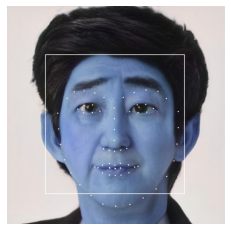

In [4]:
for image_name in image_list:
    image_path = path+image_name
    temp = image_name.split('.') # for 이미지 저장 이름
    image_save_name = "./landmark/" + temp[0] + "_landmark" + "." + temp[-1]
    image = cv2.imread(image_path)

    # 얼굴 디텍트
    faces = detector.detectMultiScale(image)

    for face in faces:
    #     save the coordinates in x, y, w, d variables
        (x,y,w,d) = face
        # Draw a white coloured rectangle around each face using the face's coordinates
        # on the "image_template" with the thickness of 2 
        cv2.rectangle(image,(x,y),(x+w, y+d),(255, 255, 255), 2)

    # 디텍팅 기반으로 랜드마크 찾기
    # Detect landmarks on "image_gray"
    
    _, landmarks = landmark_detector.fit(image, faces)
    for landmark in landmarks:
        for x,y in landmark[0]:
            # display landmarks on "image_cropped"
            # with white colour in BGR and thickness 1
            cv2.circle(image, (x, y), 1, (255, 255, 255), 3)
    plt.axis("off")
    plt.imshow(image)
    plt.savefig(image_save_name)
    print(image_name + "저장 성공!")

# WarpGAN

In [3]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
import numpy as np

from warp import dense_image_warp
from warp import interpolate_spline

from tensorflow.python.framework import constant_op
from tensorflow.python.framework import ops
from tensorflow.python.ops import array_ops, gen_array_ops, math_ops

def _get_grid_locations(image_height, image_width):
    y_range = np.linspace(0, image_height - 1, image_height)
    x_range = np.linspace(0, image_width - 1, image_width)
    y_grid, x_grid = np.meshgrid(y_range, x_range, indexing='ij')
    return np.stack((y_grid, x_grid), -1)


def _expand_to_minibatch(np_array, batch_size):
    print(batch_size)
    tiles = [batch_size] + [1] * np_array.ndim
    return gen_array_ops.tile(np.expand_dims(np_array, 0), tiles)


def _get_boundary_locations(image_height, image_width, num_points_per_edge):
  
    y_range = np.linspace(0, image_height - 1, num_points_per_edge + 2)
    x_range = np.linspace(0, image_width - 1, num_points_per_edge + 2)
    ys, xs = np.meshgrid(y_range, x_range, indexing='ij')
    is_boundary = np.logical_or(
      np.logical_or(xs == 0, xs == image_width - 1),
      np.logical_or(ys == 0, ys == image_height - 1))
    return np.stack([ys[is_boundary], xs[is_boundary]], axis=-1)


def _add_zero_flow_controls_at_boundary(control_point_locations,
                                        control_point_flows, image_height,
                                        image_width, boundary_points_per_edge):

  # batch_size = control_point_locations.get_shape()[0].value
    batch_size = tf.shape(control_point_locations)[0]

    boundary_point_locations = _get_boundary_locations(image_height, image_width,
                                                     boundary_points_per_edge)

    boundary_point_flows = np.zeros([boundary_point_locations.shape[0], 2])

    type_to_use = control_point_locations.dtype
    boundary_point_locations = tf.cast(
      _expand_to_minibatch(boundary_point_locations, batch_size),
      dtype=type_to_use)

    boundary_point_flows = tf.cast(
      _expand_to_minibatch(boundary_point_flows, batch_size), dtype=type_to_use)

    merged_control_point_locations = array_ops.concat(
      [control_point_locations, boundary_point_locations], 1)

    merged_control_point_flows = array_ops.concat(
      [control_point_flows, boundary_point_flows], 1)

    return merged_control_point_locations, merged_control_point_flows


def sparse_image_warp(image,
                      source_control_point_locations,
                      dest_control_point_locations,
                      interpolation_order=2,
                      regularization_weight=0.0,
                      num_boundary_points=0,
                      name='sparse_image_warp'):
 

    image = ops.convert_to_tensor(image)
    source_control_point_locations = ops.convert_to_tensor(
      source_control_point_locations)
    dest_control_point_locations = ops.convert_to_tensor(
      dest_control_point_locations)

    control_point_flows = (
      dest_control_point_locations - source_control_point_locations)

    clamp_boundaries = num_boundary_points > 0
    boundary_points_per_edge = num_boundary_points - 1

    with ops.name_scope(name):
        batch_size, image_height, image_width, _ = image.get_shape().as_list()
        batch_size = tf.shape(image)[0]

    # This generates the dense locations where the interpolant
    # will be evaluated.
        grid_locations = _get_grid_locations(image_height, image_width)

        flattened_grid_locations = np.reshape(grid_locations,
                                          [image_height * image_width, 2])

        flattened_grid_locations = tf.cast(
        _expand_to_minibatch(flattened_grid_locations, batch_size), image.dtype)

        if clamp_boundaries:
            (dest_control_point_locations,
       control_point_flows) = _add_zero_flow_controls_at_boundary(
           dest_control_point_locations, control_point_flows, image_height,
           image_width, boundary_points_per_edge)

        flattened_flows = interpolate_spline.interpolate_spline(
        dest_control_point_locations, control_point_flows,
        flattened_grid_locations, interpolation_order, regularization_weight)

        dense_flows = array_ops.reshape(flattened_flows,
                                    [batch_size, image_height, image_width, 2])

        warped_image = dense_image_warp.dense_image_warp(image, dense_flows)

        return warped_image, dense_flows

In [14]:
image = 'image/001218.png'
source_control_point_locations = 'pts/content/content_pts.json'
dest_control_point_locations = 'pts/style/style_pts.json'

In [15]:
sparse_image_warp(image,
                      source_control_point_locations,
                      dest_control_point_locations,
                      interpolation_order=2,
                      regularization_weight=0.0,
                      num_boundary_points=0,
                      name='sparse_image_warp')

InvalidArgumentError: Value for attr 'T' of string is not in the list of allowed values: bfloat16, half, float, double, uint8, int8, uint16, int16, int32, int64, complex64, complex128, uint32
	; NodeDef: {{node Sub}}; Op<name=Sub; signature=x:T, y:T -> z:T; attr=T:type,allowed=[DT_BFLOAT16, DT_HALF, DT_FLOAT, DT_DOUBLE, DT_UINT8, DT_INT8, DT_UINT16, DT_INT16, DT_INT32, DT_INT64, DT_COMPLEX64, DT_COMPLEX128, DT_UINT32]> [Op:Sub]